In [138]:
# estamos

**PARTE I: ANALIZANDO LA BASE**

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [164]:
#Bases Tizi
#base_04_sucia = pd.read_stata(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP3\Individual_t104.dta")
#base_24_sucia = pd.read_excel(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP3\usu_individual_T124.xlsx")

# Base Angie
base_04_sucia = pd.read_stata(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/Individual_t104.dta')
base_24_sucia = pd.read_excel(r'/Users/angelanavajas/Desktop/Ciencia de datos/CC408-T1-4/TP3/usu_individual_T124.xlsx')


In [165]:
print(base_04_sucia)

         CODUSU  nro_hogar componente  h15    ano4       trimestre  \
0      125098          1.0        1.0   Sí  2004.0  1er. Trimestre   
1      125397          1.0        1.0   Sí  2004.0  1er. Trimestre   
2      125515          1.0        1.0   Sí  2004.0  1er. Trimestre   
3      125558          1.0        1.0   Sí  2004.0  1er. Trimestre   
4      125558          1.0        2.0   Sí  2004.0  1er. Trimestre   
...         ...        ...        ...  ...     ...             ...   
45284  285733          1.0        1.0   Sí  2004.0  1er. Trimestre   
45285  285733          1.0        2.0   Sí  2004.0  1er. Trimestre   
45286  285733          1.0        3.0   Sí  2004.0  1er. Trimestre   
45287  285733          1.0        4.0  0.0  2004.0  1er. Trimestre   
45288  285733          1.0        5.0  0.0  2004.0  1er. Trimestre   

                  region mas_500              aglomerado  pondera  ... deccfr  \
0      Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07 

In [166]:
base_04_filtrada = base_04_sucia.loc[base_04_sucia['aglomerado'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])]
base_24_filtrada = base_24_sucia.loc[base_24_sucia['AGLOMERADO'].isin([32, 33])]

In [167]:
print(base_24_filtrada)

                              CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
245    TQRMNOSUWHLKMUCDEIJAH00855260  2024          1          1           1   
246    TQRMNOSUWHLKMUCDEIJAH00855260  2024          1          1           2   
247    TQRMNOSUWHLKMUCDEIJAH00855260  2024          1          1           3   
255    TQSMNORWVHLLKQCDEIJAH00856914  2024          1          1           1   
256    TQRMNOPQQHLOLRCDEIJAH00855133  2024          1          1           1   
...                              ...   ...        ...        ...         ...   
46045  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           1   
46046  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           2   
46047  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           3   
46048  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           4   
46049  TQRMNOPUQHKMKNCDEIJAH00861661  2024          1          1           5   

       H15  REGION MAS_500  AGLOMERADO 

In [208]:
print(base_04_filtrada)

        codusu  nro_hogar componente  h15    ano4       trimestre  \
0     125098          1.0        1.0   Sí  2004.0  1er. Trimestre   
1     125397          1.0        1.0   Sí  2004.0  1er. Trimestre   
2     125515          1.0        1.0   Sí  2004.0  1er. Trimestre   
3     125558          1.0        1.0   Sí  2004.0  1er. Trimestre   
4     125558          1.0        2.0   Sí  2004.0  1er. Trimestre   
...        ...        ...        ...  ...     ...             ...   
7642  288171          1.0        3.0  0.0  2004.0  1er. Trimestre   
7643  288405          1.0        1.0   Sí  2004.0  1er. Trimestre   
7644  288405          1.0        2.0   Sí  2004.0  1er. Trimestre   
7645  288405          1.0        3.0   Sí  2004.0  1er. Trimestre   
7646  288405          1.0        4.0   Sí  2004.0  1er. Trimestre   

                 region mas_500              aglomerado  pondera  ... deccfr  \
0     Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1     Gran 

In [169]:
# Obtener los nombres de las variables
nombres_variables04 = base_04_sucia.columns.tolist()

# Mostrar los nombres de las variables
print(nombres_variables04)

['CODUSU', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', '

In [170]:
# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()

# Mostrar los nombres de las variables
print(nombres_variables24)

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [171]:
#Para poder unir sin problema, me aseguro que als variables esten en el mismo formato
base_04_filtrada.columns = base_04_filtrada.columns.str.lower()
base_24_filtrada.columns = base_24_filtrada.columns.str.lower()

In [172]:
# Obtener los nombres de las variables
nombres_variables24 = base_24_filtrada.columns.tolist()

# Mostrar los nombres de las variables
print(nombres_variables24)

['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'imputa', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp

In [309]:
base_prelimpieza = pd.concat([base_24_filtrada, base_04_filtrada])
print(base_prelimpieza)



                             codusu    ano4       trimestre  nro_hogar  \
245   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
246   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
247   TQRMNOSUWHLKMUCDEIJAH00855260  2024.0               1        1.0   
255   TQSMNORWVHLLKQCDEIJAH00856914  2024.0               1        1.0   
256   TQRMNOPQQHLOLRCDEIJAH00855133  2024.0               1        1.0   
...                             ...     ...             ...        ...   
7642                       288171    2004.0  1er. Trimestre        1.0   
7643                       288405    2004.0  1er. Trimestre        1.0   
7644                       288405    2004.0  1er. Trimestre        1.0   
7645                       288405    2004.0  1er. Trimestre        1.0   
7646                       288405    2004.0  1er. Trimestre        1.0   

     componente  h15             region mas_500        aglomerado  pondera  \
245           1    1             

In [295]:
print(base_prelimpieza['ipcf'])


245          0.000000
246          0.000000
247          0.000000
255     500000.000000
256          0.000000
            ...      
7642       533.333333
7643       100.000000
7644       100.000000
7645       100.000000
7646       100.000000
Name: ipcf, Length: 14698, dtype: float64


Las variables que vamos a usar son:
- CH04: Sexo
- CH06: Años
- CH07: Estado civil 
- CH08: Estado cobertura médica
- NIVEL_ED: Nivel educativo 
- ESTADO: Condicion de actividad
- CAT_INAC: Categoria de inactividad
- IPCF: Monto de ingreso per cápita familiar percibido en el mes de referencia

In [224]:
#Como las variables de 2004 son categoricas voy a cambiar las variables que nos interesan para que sigan todas las mismas categorias 
conteo_año = base_prelimpieza.groupby(['ano4']).size()
print(conteo_año)


ano4
2004.0    7647
2024.0    7051
dtype: int64


In [225]:
conteo_genero = base_prelimpieza.groupby(['ch04']).size()
print(conteo_genero)
#Convierto en cadena para no perder los valores numericos
base_prelimpieza['ch04'] = base_prelimpieza['ch04'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_prelimpieza['ch04'] = base_prelimpieza['ch04'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_prelimpieza['ch04'] = base_prelimpieza['ch04'].replace({
    '2': 'mujer', 
    'mujer': 'mujer',
    '1': 'varón',
    'varón': 'varón'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_prelimpieza['ch04'].value_counts())


ch04
1        3371
2        3680
Mujer    4045
Varón    3602
dtype: int64
Resultado del cambio:
ch04
mujer    7725
varón    6973
Name: count, dtype: int64


In [226]:
conteo_estadocivil = base_prelimpieza.groupby(['ch07']).size()
print(conteo_estadocivil)

ch07
1                        1297
2                        1507
3                         459
4                         400
5                        3375
9                          13
Casado                   2372
Separado o divorciado     338
Soltero                  3687
Unido                     821
Viudo                     429
dtype: int64


In [250]:
#Convierto en cadena para no perder los valores numericos
base_prelimpieza['ch07'] = base_prelimpieza['ch07'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_prelimpieza['ch07'] = base_prelimpieza['ch07'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_prelimpieza['ch07'] = base_prelimpieza['ch07'].replace({
    'unido': '1', 
    'casado': '2', 
    'separado o divorciado': '3', 
    'viudo': '4', 
    'soltero': '5'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_prelimpieza['ch07'].value_counts())

Resultado del cambio:
ch07
5    7062
2    3879
1    2118
4     829
3     797
9      13
Name: count, dtype: int64


In [252]:
conteo_coberturamedica = base_prelimpieza.groupby(['ch08']).size()
print(conteo_coberturamedica)
total_coberturas = conteo_coberturamedica.sum()
print("\nCantidad total:", total_coberturas)


ch08
1                                                               4308
12                                                               121
13                                                                 3
2                                                                566
23                                                                 1
3                                                                  2
4                                                               2025
9                                                                 25
mutual/prepaga/servicio de emergencia                            610
mutual/prepaga/servicio de emergencia/planes y seguros públi       4
no paga ni le descuentan                                        3296
ns./nr.                                                           11
obra social (incluye pami)                                      3568
obra social y mutual/prepaga/servicio de emergencia              111
planes y seguros públicos    

In [253]:
#Convierto en cadena para no perder los valores numericos
base_prelimpieza['ch08'] = base_prelimpieza['ch08'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_prelimpieza['ch08'] = base_prelimpieza['ch08'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_prelimpieza['ch08'] = base_prelimpieza['ch08'].replace({
    'obra social (incluye pami)': '1',  
    'mutual/prepaga/servicio de emergencia': '2',  
    'planes y seguros públicos': '3',  
    'no paga ni le descuentan': '4',  
    'ns./nr.': '9',  
    'obra social y mutual/prepaga/servicio de emergencia': '12',  
    'obra social y planes y seguros públicos': '13',  
    'mutual/prepaga/servicio de emergencia/planes y seguros públi': '23',  
    'obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': '123'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_prelimpieza['ch08'].value_counts())
total_coberturas = conteo_coberturamedica.sum()
print("\nCantidad total:", total_coberturas)

Resultado del cambio:
ch08
1     7876
4     5321
2     1176
12     232
3       49
9       36
23       5
13       3
Name: count, dtype: int64

Cantidad total: 14698


In [267]:
conteo_niveleducativo = base_prelimpieza.groupby(['nivel_ed']).size()
print(conteo_niveleducativo)
total_niveleducativo = conteo_niveleducativo.sum()
print("\nCantidad total:", total_niveleducativo)


nivel_ed
1                                                    867
2                                                    746
3                                                   1416
4                                                   1610
5                                                    882
6                                                   1108
7                                                    422
Primaria Completa                                   1628
Primaria Incompleta (incluye educación especial)    1406
Secundaria Completa                                 1086
Secundaria Incompleta                               1374
Sin instrucción                                      805
Superior Universitaria Completa                      647
Superior Universitaria Incompleta                    701
dtype: int64

Cantidad total: 14698


In [269]:
#Convierto en cadena para no perder los valores numericos
base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_prelimpieza['nivel_ed'] = base_prelimpieza['nivel_ed'].replace({
    'primaria incompleta (incluye educación especial)': '1',  
    'primaria completa': '2',  
    'secundaria incompleta': '3',  
    'secundaria completa': '4',  
    'superior universitaria incompleta': '5',  
    'superior universitaria completa': '6',  
    'sin instrucción': '7',  
    'ns./nr.': '9'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_prelimpieza['nivel_ed'].value_counts())
total_niveleducativo = conteo_niveleducativo.sum()
print("\nCantidad total:", total_niveleducativo)

Resultado del cambio:
nivel_ed
3    2790
4    2696
2    2374
1    2273
6    1755
5    1583
7    1227
Name: count, dtype: int64

Cantidad total: 14698


In [270]:
conte_estado = base_prelimpieza.groupby(['estado']).size()
print(conte_estado)

estado
0                                                                 41
1                                                               3224
2                                                                311
3                                                               2662
4                                                                813
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Inactivo                                                        2800
Menor de 10 años                                                1230
Ocupado                                                         3079
dtype: int64


In [273]:
#Convierto en cadena para no perder los valores numericos
base_prelimpieza['estado'] = base_prelimpieza['estado'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_prelimpieza['estado'] = base_prelimpieza['estado'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_prelimpieza['estado'] = base_prelimpieza['estado'].replace({
    'ocupado': '1',  
    'desocupado': '2',  
    'inactivo': '3',  
    'menor de 10 años': '4',  
    'entrevista individual no realizada (no respuesta al cuestion': '0'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_prelimpieza['estado'].value_counts())
total_niveleducativo = conte_estado.sum()
print("\nCantidad total:", total_niveleducativo)


Resultado del cambio:
estado
1    6303
3    5462
4    2043
2     839
0      51
Name: count, dtype: int64

Cantidad total: 14698


In [274]:
conte_categorainac = base_prelimpieza.groupby(['cat_inac']).size()
print(conte_categorainac)


cat_inac
0                      7193
1                       717
2                        18
3                      1440
4                       653
5                       402
6                        59
7                       186
Ama de casa             816
Discapacitado            41
Estudiante             1594
Jubilado/pensionado     668
Menor de 6 años         763
Otros                   134
Rentista                 14
dtype: int64


In [282]:
#Convierto en cadena para no perder los valores numericos
base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].astype(str)
#Me aseguro que las variables esten prolijas para que se hagan los cambios que le pido
base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].str.strip().str.lower()
#Siento que aca me podria fijar de hacerlo en una nueva base en vez de ir poniendo todo en las misma piorque si no se encima...
# Reemplazar los valores de '1', '2', 'mujer' y 'varón'
base_prelimpieza['cat_inac'] = base_prelimpieza['cat_inac'].replace({
    'jubilado/pensionado': '1',  
    'rentista': '2',  
    'estudiante': '3',  
    'ama de casa': '4',  
    'menor de 6 años': '5',  
    'discapacitado': '6',  
    'otros': '7'
})

#Reviso que no se me pierdan datos
print('Resultado del cambio:')
print(base_prelimpieza['cat_inac'].value_counts())


Resultado del cambio:
cat_inac
0.0    3617
0      3576
3      3034
4      1469
1      1385
5      1165
7       320
6       100
2        32
Name: count, dtype: int64


In [ ]:
#ACA QUEDO UN MONTON DE RESPUESTA 0 QUE NI PUTA IDEA QUE ES

In [310]:
base_prelimpieza['ch06'] = pd.to_numeric(base_prelimpieza['ch06'], errors='coerce')
#Saco las edades negativas
base_prelimpieza1 = base_prelimpieza[base_prelimpieza['ch06'] >= 0]

In [316]:
valores_negativos = base_prelimpieza1[base_prelimpieza1['ipcf'] < 0]
cantidad_negativos = len(valores_negativos)
# Mostrar resultados
print(f'Cantidad de valores negativos en "ipcf": {cantidad_negativos}')
if cantidad_negativos > 0:
    print('Valores negativos encontrados:')
    print(valores_negativos['ipcf'])
else:
    print('No se encontraron valores negativos en "ipcf".')

Cantidad de valores negativos en "ipcf": 0
No se encontraron valores negativos en "ipcf".


In [317]:
base_prelimpieza1.describe()

,ano4,nro_hogar,pondera,ch06,imputa,pp03d,pp3e_tot,pp3f_tot,pp04b2,pp04b3_mes,...,v10_m,v11_m,v12_m,v18_m,v19_am,v21_m,t_vi,itf,ipcf,pondih
count,14512.000000,14512.000000,14512.000000,14512.000000,77.0,10736.000000,10736.000000,10736.000000,10736.000000,10736.000000,...,1.451200e+04,14512.000000,14512.000000,14512.000000,14512.0,1.451200e+04,1.451200e+04,1.451200e+04,1.451200e+04,7000.000000
mean,2013.647189,1.024738,1931.776599,36.095438,1.0,0.112798,24.619691,1.504937,0.051975,0.132265,...,3.019623e+03,91.327867,1251.127619,76.382787,0.0,2.797703e+03,2.618228e+04,2.193608e+05,7.761704e+04,2260.920000
std,9.994119,0.602645,900.662897,22.642513,0.0,0.506539,67.444004,29.112489,0.429577,2.913249,...,2.517182e+05,1550.655529,17533.927719,5662.926277,0.0,2.894616e+04,2.778702e+05,7.874061e+05,2.797229e+05,2671.117952
min,2004.000000,1.000000,42.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.000000e+00,-9.000000,-9.000000,-9.000000,0.0,-9.000000e+00,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2004.000000,1.000000,1441.000000,17.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,2.500000e+02,5.714286e+01,0.000000
50%,2004.000000,1.000000,1686.000000,33.000000,1.0,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,1.000000e+03,2.666667e+02,1669.000000
75%,2024.000000,1.000000,2237.000000,53.000000,1.0,0.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,1.810000e+05,5.833333e+04,3894.250000
max,2024.000000,51.000000,8685.000000,97.000000,1.0,9.000000,999.000000,999.000000,31.000000,99.000000,...,3.000000e+07,80000.000000,800000.000000,540000.000000,0.0,2.000000e+06,3.010000e+07,3.393700e+07,1.131233e+07,21006.000000


In [153]:
# Edad sea menor a 17 y no son solteros 
filtro_edad = base_prelimpieza['ch06'] < 17
filtro_edad_CH07 = base_prelimpieza['ch07'] != 5  
registros_edad_CH07 = base_prelimpieza[filtro_edad & filtro_edad_CH07][['ch06', 'ch07']]
print(registros_edad_CH07)

       ch06     ch07
703    15.0        4
18274  16.0        1
19483  15.0        9
19485  15.0        9
19486  15.0        9
...     ...      ...
7633    4.0  Soltero
7636   13.0  Soltero
7639    6.0  Soltero
7642    1.0  Soltero
7645   12.0  Soltero

[2009 rows x 2 columns]


In [154]:
# Filtrar los registros donde CH07 no sea 1, 2, 3, 4 o 5
filtro_CH07 = ~base_prelimpieza['ch07'].isin([1, 2, 3, 4, 5])
registros_ch07 = base_prelimpieza[filtro_CH07][['ch06', 'ch07']]
print(registros_ch07)

       ch06     ch07
410    21.0        9
411    21.0        9
19483  15.0        9
19484  53.0        9
19485  15.0        9
...     ...      ...
7642    1.0  Soltero
7643   51.0   Casado
7644   55.0   Casado
7645   12.0  Soltero
7646   22.0  Soltero

[7525 rows x 2 columns]


In [155]:
# Dice que no se hizo la entrevista (h15 == 2)
h15_no = base_prelimpieza[base_prelimpieza['h15'] == 2]
respuestas = h15_no[['h15','ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
print(respuestas)

      h15 ch04  ch06 ch07 ch08 nivel_ed estado cat_inac  ipcf
399     2    2  49.0    2    4        2      0        0   0.0
400     2    2  25.0    5    4        6      0        0   0.0
401     2    1  20.0    5    4        5      0        0   0.0
409     2    1  74.0    5    2        5      0        0   0.0
410     2    1  21.0    9    9        5      0        0   0.0
411     2    1  21.0    9    9        5      0        0   0.0
15241   2    1  45.0    1    4        4      0        0   0.0
17096   2    1  45.0    2    2        6      0        0   0.0
19483   2    1  15.0    9    9        3      0        0   0.0
19484   2    1  53.0    9    9        2      0        0   0.0
19485   2    1  15.0    9    9        3      0        0   0.0
19486   2    1  15.0    9    9        3      0        0   0.0
19597   2    2  38.0    9    9        4      0        0   0.0
19598   2    1  40.0    9    9        4      0        0   0.0
26078   2    1  16.0    5    1        3      0        0   0.0
26079   

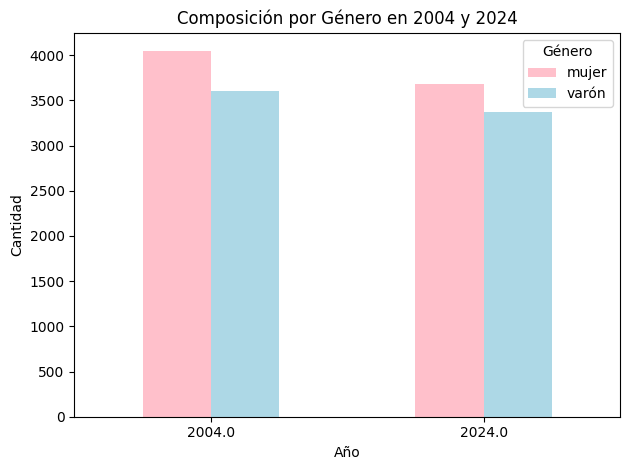

In [195]:
# Contar la cantidad de hombres y mujeres por año
composicion = base_prelimpieza.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
composicion.plot(kind='bar', color=['pink', 'lightblue'])

# Gráfico
plt.title('Composición por Género en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Para tener las etiquetas en horizontal
plt.legend(title='Género')
plt.tight_layout()  # Ajustar el layout
plt.show()

In [ ]:
#Verifico que las variables que quiero usar en la matriz de correlacion compartan etiqueta

Las variables que vamos a usar son:
- CH04: Sexo
- CH06: Años
- CH07: Estado civil 
- CH08: Estado cobertura médica
- NIVEL_ED: Nivel educativo 
- ESTADO: Condicion de actividad
- CAT_INAC: Categoria de inactividad
- IPCF: Monto de ingreso per cápita familiar percibido en el mes de referencia

In [200]:
conteo_año = base_prelimpieza.groupby(['ano4']).size()
print(conteo_año)
conteo_genero = base_prelimpieza.groupby(['ch04']).size()
print(conteo_genero)
conteo_estadocivil = base_prelimpieza.groupby(['ch07']).size()
print(conteo_estadocivil)
conteo_coberturamedica = base_prelimpieza.groupby(['ch08']).size()
print(conteo_coberturamedica)

ano4
2004.0    7647
2024.0    7051
dtype: int64
ch04
mujer    7725
varón    6973
dtype: int64
ch07
1                        1297
2                        1507
3                         459
4                         400
5                        3375
9                          13
Casado                   2372
Separado o divorciado     338
Soltero                  3687
Unido                     821
Viudo                     429
dtype: int64
ch08
1                                                               4308
2                                                                566
3                                                                  2
4                                                               2025
9                                                                 25
12                                                               121
13                                                                 3
23                                                                 1
M

In [201]:
conte_niveleducativo = base_prelimpieza.groupby(['nivel_ed']).size()
print(conte_niveleducativo)
conte_estado = base_prelimpieza.groupby(['estado']).size()
print(conte_estado)
conte_categorainac = base_prelimpieza.groupby(['cat_inac']).size()
print(conte_categorainac)
conte_ingreso = base_prelimpieza.groupby(['ipcf']).size()
print(conte_ingreso)

nivel_ed
1                                                    867
2                                                    746
3                                                   1416
4                                                   1610
5                                                    882
6                                                   1108
7                                                    422
Primaria Completa                                   1628
Primaria Incompleta (incluye educación especial)    1406
Secundaria Completa                                 1086
Secundaria Incompleta                               1374
Sin instrucción                                      805
Superior Universitaria Completa                      647
Superior Universitaria Incompleta                    701
dtype: int64
estado
0                                                                 41
1                                                               3224
2                                  